# Pat Tutka
# Bonus Question for Capital BikeShare Week 5

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


In [2]:
bikes = pd.read_csv('C:\JHU_Python\data\cycletrips2016.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

In [3]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))


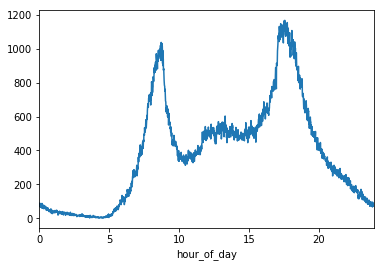

In [4]:
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot()

In [205]:
df_error2

,polytrain2,polytest2,degree
0,74573.88185,78231.84600,1
1,41112.87632,45427.96571,2
2,33142.49987,34641.38374,3
3,33134.43537,34526.31945,4
4,32000.10045,33547.65421,5
5,26569.00685,27194.15461,6
6,20310.19781,20676.86824,7
7,16464.19408,17009.25428,8
8,13529.01294,13531.07606,9
9,13016.33471,13375.20583,10


This is my error chart for the various degree levels that I chose for the model.

Text(0,0.5,'Mean Square Error')

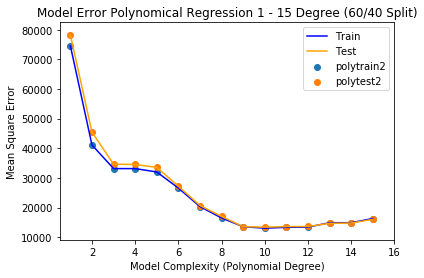

In [201]:
plt.scatter(Degree,polytrain2)
plt.scatter(Degree,polytest2)
plt.plot(Degree,polytrain2, color='blue', label='Train')
plt.plot(Degree,polytest2, color='orange', label='Test')
plt.legend()
plt.xlim(0.5,16)
plt.ylim()
plt.title("Model Error Polynomical Regression 1 - 15 Degree (60/40 Split)")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Square Error")

For the above model I chose a 60/40 split for polynomial regression baseline 10 degree polynomial. Although I found test error to be lower at the 80/20 and 90/10 levels, their respective training error was much higher. I additionally tested ridge models on the data as well and their respective errors are plotted below. I retested the 60/40 polynomial model with varying degrees (1-15) and found that the 10 degree polynomial model has the least amount of error. I was happy to see that the above polynomial error model performed very well and the overall train-test error began to increase after 10 degrees. 

Text(0,0.5,'Mean Square Error')

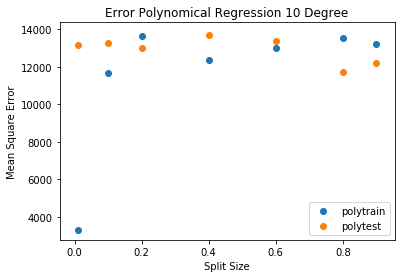

In [197]:
plt.scatter(split,polytrain)
plt.scatter(split,polytest)
#plt.plot(split,polytrain, color='orange', label='Train')
#plt.plot(split,polytest, color='orange', label='Test')
plt.legend()
plt.xlim()
plt.ylim()
plt.title("Error Polynomical Regression 10 Degree")
plt.xlabel("Split Size")
plt.ylabel("Mean Square Error")

Text(0,0.5,'Mean Square Error')

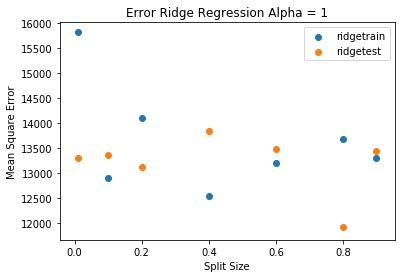

In [196]:
plt.scatter(split3,ridgetrain)
plt.scatter(split4,ridgetest)
#plt.plot(split,ridgetrain, color='blue', label='Train')
#plt.plot(split,ridgetest, color='orange', label='Test')
plt.legend()
plt.xlim()
plt.ylim()
plt.title("Error Ridge Regression Alpha = 1")
plt.xlabel("Split Size")
plt.ylabel("Mean Square Error")

In [5]:
X = hours.hour.values.reshape(-1, 1) # the x variable is pulled from the new "hour column" in the hours dataframe. The hour column is a mirror of hour_of_day index column.
y = hours.start #count of trips aggregate

In [6]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, train_size=.001)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
poly = PolynomialFeatures(degree=10)
Xpoly1 = poly.fit_transform(x_train1)

In [8]:
linear2 = linear_model.LinearRegression()
linear2.fit(Xpoly1, y_train1)
(linear2.coef_, linear2.intercept_)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 1091.0)

In [9]:
y_pred = linear2.predict(Xpoly1)
#y_pred2 = linear2.predict(X_test_poly)

In [10]:
mean_squared_error(y_train1, y_pred)

0.0

In [11]:
poly = PolynomialFeatures(degree=10)
Xpoly2 = poly.fit_transform(x_test1)

In [12]:
linear21 = linear_model.LinearRegression()
linear21.fit(Xpoly2, y_test1)
(linear21.coef_, linear21.intercept_)

(array([  0.00000000e+00,  -4.34577784e+02,   5.70367105e+02,
         -3.16265147e+02,   8.69878552e+01,  -1.31829805e+01,
          1.17657119e+00,  -6.33778324e-02,   2.02234865e-03,
         -3.51246171e-05,   2.55201144e-07]), 137.9677167102239)

In [13]:
y_pred2 = linear21.predict(Xpoly2)

In [14]:
mean_squared_error(y_test1, y_pred2)

13193.842177073728

In [15]:
ridge1 = linear_model.Ridge(alpha=1)
ridge1.fit(Xpoly1, y_train1)
ridge1.coef_, ridge1.intercept_

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), 1091.0)

In [16]:
ridge2 = linear_model.Ridge(alpha=1)
ridge2.fit(Xpoly2, y_test1)
ridge2.coef_, ridge2.intercept_

(array([  0.00000000e+00,  -1.31102834e+02,   2.77599725e+02,
         -1.90569800e+02,   5.76579841e+01,  -9.08996567e+00,
          8.19507422e-01,  -4.37396583e-02,   1.36081666e-03,
         -2.26619093e-05,   1.54637040e-07]), 54.910862365319474)

In [17]:
y_pred3 = ridge1.predict(Xpoly1)

In [18]:
mean_squared_error(y_train1, y_pred3)

0.0

In [19]:
y_pred4 = ridge2.predict(Xpoly2)

In [20]:
mean_squared_error(y_test1, y_pred4)

13290.905155024071

In [21]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, train_size=.01)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
poly = PolynomialFeatures(degree=10)
Xpoly3 = poly.fit_transform(x_train2)

In [23]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly3, y_train2)
(linear.coef_, linear.intercept_)

(array([  0.00000000e+00,   1.60697562e+03,   1.25487501e+03,
         -1.48540788e+03,   5.61155228e+02,  -1.09806679e+02,
          1.26061847e+01,  -8.82263821e-01,   3.70774062e-02,
         -8.60384751e-04,   8.47468232e-06]), -2199.9302865607397)

In [24]:
y_pred = linear.predict(Xpoly3)

In [25]:
mean_squared_error(y_train2, y_pred)

3311.7294389625226

In [26]:
poly = PolynomialFeatures(degree=10)
Xpoly4 = poly.fit_transform(x_test2)

In [27]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly4, y_test2)
(linear.coef_, linear.intercept_)

(array([  0.00000000e+00,  -4.38632322e+02,   5.74712348e+02,
         -3.18201997e+02,   8.74337245e+01,  -1.32421316e+01,
          1.18131525e+00,  -6.36089479e-02,   2.02893222e-03,
         -3.52230135e-05,   2.55770374e-07]), 138.70404037132045)

In [28]:
y_pred = linear.predict(Xpoly4)

In [29]:
mean_squared_error(y_test2, y_pred)

13182.948886187274

In [30]:
ridge1 = linear_model.Ridge(alpha=1)
ridge1.fit(Xpoly3, y_train2)
ridge1.coef_, ridge1.intercept_

(array([  0.00000000e+00,  -5.74702953e+00,  -2.33712112e+01,
         -3.76290587e+01,   1.60365396e+01,  -1.16184389e+00,
         -2.50841198e-01,   5.07827030e-02,  -3.67589543e-03,
          1.22671944e-04,  -1.58031971e-06]), 134.83153567782472)

In [31]:
y_pred = ridge2.predict(Xpoly3)

In [32]:
mean_squared_error(y_train2, y_pred)

15811.625926126144

In [33]:
ridge = linear_model.Ridge(alpha=1)
ridge.fit(Xpoly4, y_test2)
ridge.coef_, ridge.intercept_

(array([  0.00000000e+00,  -1.21292370e+02,   2.65131259e+02,
         -1.84101659e+02,   5.59123076e+01,  -8.81624552e+00,
          7.93206181e-01,  -4.21684577e-02,   1.30391545e-03,
         -2.15186333e-05,   1.44862350e-07]), 53.667021282456119)

In [34]:
y_pred = ridge.predict(Xpoly4)

In [35]:
mean_squared_error(y_test2, y_pred)

13291.739003471774

In [36]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, y, train_size=.1)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [37]:
poly = PolynomialFeatures(degree=10)
Xpoly0 = poly.fit_transform(x_train3)

In [38]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train3)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train3, y_pred)

11702.933762911998

In [39]:
poly = PolynomialFeatures(degree=10)
Xpoly1 = poly.fit_transform(x_test3)

In [40]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test3)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test3, y_pred)

13253.573432465118

In [41]:
ridge1 = linear_model.Ridge(alpha=1)
ridge1.fit(Xpoly0, y_train3)
y_pred = ridge.predict(Xpoly0)
mean_squared_error(y_train3, y_pred)

12903.512363391925

In [42]:
ridge1 = linear_model.Ridge(alpha=1)
ridge1.fit(Xpoly1, y_test3)
y_pred = ridge.predict(Xpoly1)
mean_squared_error(y_test3, y_pred)

13365.494075897755

In [43]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(X, y, train_size=.2)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [44]:
poly = PolynomialFeatures(degree=10)
Xpoly0 = poly.fit_transform(x_train4)
poly = PolynomialFeatures(degree=10)
Xpoly1 = poly.fit_transform(x_test4)

In [45]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train4)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train4, y_pred)

13624.304698270596

In [46]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test4)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test4, y_pred)

13002.690140026767

In [47]:
ridge1 = linear_model.Ridge(alpha=1)
ridge1.fit(Xpoly0, y_train4)
y_pred = ridge.predict(Xpoly0)
mean_squared_error(y_train4, y_pred)

14102.782527121648

In [48]:
ridge1 = linear_model.Ridge(alpha=1)
ridge1.fit(Xpoly1, y_test4)
y_pred = ridge.predict(Xpoly1)
mean_squared_error(y_test4, y_pred)

13123.424249028554

In [49]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(X, y, train_size=.4)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [50]:
poly = PolynomialFeatures(degree=10)
Xpoly0 = poly.fit_transform(x_train5)
poly = PolynomialFeatures(degree=10)
Xpoly1 = poly.fit_transform(x_test5)

In [51]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train5)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train5, y_pred)

12353.709845691068

In [52]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test5)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test5, y_pred)

13694.105524810264

In [53]:
ridge1 = linear_model.Ridge(alpha=1)
ridge1.fit(Xpoly0, y_train5)
y_pred = ridge.predict(Xpoly0)
mean_squared_error(y_train5, y_pred)

12545.767952546717

In [54]:
ridge1 = linear_model.Ridge(alpha=1)
ridge1.fit(Xpoly1, y_test5)
y_pred = ridge.predict(Xpoly1)
mean_squared_error(y_test5, y_pred)

13834.981206047478

In [55]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(X, y, train_size=.6)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [56]:
poly = PolynomialFeatures(degree=10)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=10)
Xpoly1 = poly.fit_transform(x_test6)

In [57]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

13016.334707504653

In [58]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

13375.205831833307

In [59]:
ridge1 = linear_model.Ridge(alpha=1)
ridge1.fit(Xpoly0, y_train6)
y_pred = ridge.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

13206.840322979726

In [60]:
ridge1 = linear_model.Ridge(alpha=1)
ridge1.fit(Xpoly1, y_test6)
y_pred = ridge.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

13487.979277148348

In [61]:
x_train7, x_test7, y_train7, y_test7 = train_test_split(X, y, train_size=.8)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [62]:
poly = PolynomialFeatures(degree=10)
Xpoly0 = poly.fit_transform(x_train7)
poly = PolynomialFeatures(degree=10)
Xpoly1 = poly.fit_transform(x_test7)

In [63]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train7)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train7, y_pred)

13553.720260947124

In [64]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test7)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test7, y_pred)

11734.994894948226

In [65]:
ridge1 = linear_model.Ridge(alpha=1)
ridge1.fit(Xpoly0, y_train7)
y_pred = ridge.predict(Xpoly0)
mean_squared_error(y_train7, y_pred)

13671.401551359428

In [66]:
ridge1 = linear_model.Ridge(alpha=1)
ridge1.fit(Xpoly1, y_test7)
y_pred = ridge.predict(Xpoly1)
mean_squared_error(y_test7, y_pred)

11910.87331779815

In [67]:
x_train8, x_test8, y_train8, y_test8 = train_test_split(X, y, train_size=.9)

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [68]:
poly = PolynomialFeatures(degree=10)
Xpoly0 = poly.fit_transform(x_train8)
poly = PolynomialFeatures(degree=10)
Xpoly1 = poly.fit_transform(x_test8)

In [69]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train8)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train8, y_pred)

13215.541646751213

In [70]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test8)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test8, y_pred)

12210.764960968181

In [71]:
ridge1 = linear_model.Ridge(alpha=1)
ridge1.fit(Xpoly0, y_train8)
y_pred = ridge.predict(Xpoly0)
mean_squared_error(y_train8, y_pred)

13306.072447592507

In [72]:
ridge1 = linear_model.Ridge(alpha=1)
ridge1.fit(Xpoly1, y_test8)
y_pred = ridge.predict(Xpoly1)
mean_squared_error(y_test8, y_pred)

13438.307018139189

# 3. Vary the split size from .01 to .99 with at least 10 values (the more the merrier!). Plot the resulting Training error and Testing error vs. split size. Create separate plots for Linear and Ridg

In [193]:
df_error = pd.read_csv('C:\JHU_Python\Bonus.csv')

In [194]:
df_error

,split,polytrain,polytest,ridgetrain,ridgetest,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,3311.729439,13182.94889,15811.62593,13291.73900,NaN,NaN,NaN
2,0.10,11702.933760,13253.57343,12903.51236,13365.49408,NaN,NaN,NaN
3,0.20,13624.304700,13002.69014,14102.78253,13123.42425,NaN,NaN,NaN
4,0.40,12353.709850,13694.10552,12545.76795,13834.98121,NaN,NaN,NaN
5,0.60,13016.334710,13375.20583,13206.84032,13487.97928,NaN,NaN,NaN
6,0.80,13553.720260,11734.99489,13671.40155,11910.87332,NaN,NaN,NaN
7,0.90,13215.541650,12210.76496,13306.07245,13438.30702,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
split = df_error.split
polytrain = df_error.polytrain

In [172]:
split1 = df_error.split
polytest = df_error.polytest

In [180]:
df_error2 = pd.read_csv('C:\JHU_Python\Bonus2.csv')

In [181]:
Degree=df_error2.degree

In [182]:
polytrain2 = df_error2.polytrain2
polytest2 = df_error2.polytest2

Text(0,0.5,'Mean Square Error')

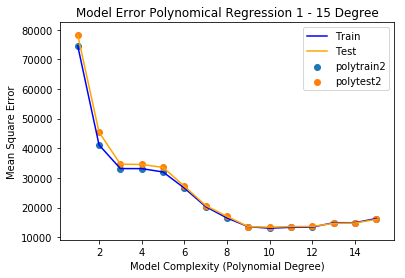

In [186]:
plt.scatter(Degree,polytrain2)
plt.scatter(Degree,polytest2)
plt.plot(Degree,polytrain2, color='blue', label='Train')
plt.plot(Degree,polytest2, color='orange', label='Test')
plt.legend()
plt.xlim()
plt.ylim()
plt.title("Model Error Polynomical Regression 1 - 15 Degree")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Square Error")

Text(0,0.5,'Mean Square Error')

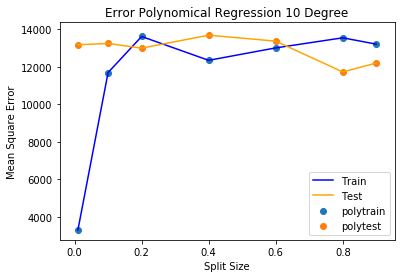

In [93]:
plt.scatter(split,polytrain)
plt.scatter(split,polytest)
plt.plot(split,polytrain, color='blue', label='Train')
plt.plot(split,polytest, color='orange', label='Test')
plt.legend()
plt.xlim()
plt.ylim()
plt.title("Error Polynomical Regression 10 Degree")
plt.xlabel("Split Size")
plt.ylabel("Mean Square Error")

In [94]:
split3 = df_error.split
ridgetrain = df_error.ridgetrain

In [95]:
split4 = df_error.split
ridgetest = df_error.ridgetest

Text(0,0.5,'Mean Square Error')

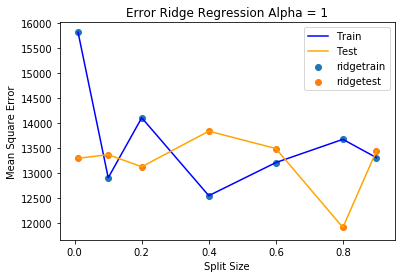

In [96]:
plt.scatter(split3,ridgetrain)
plt.scatter(split4,ridgetest)
plt.plot(split,ridgetrain, color='blue', label='Train')
plt.plot(split,ridgetest, color='orange', label='Test')
plt.legend()
plt.xlim()
plt.ylim()
plt.title("Error Ridge Regression Alpha = 1")
plt.xlabel("Split Size")
plt.ylabel("Mean Square Error")

In [109]:
poly = PolynomialFeatures(degree=1)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=1)
Xpoly1 = poly.fit_transform(x_test6)

In [110]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

74573.881846925971

In [111]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

78231.845998612669

In [112]:
poly = PolynomialFeatures(degree=2)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=2)
Xpoly1 = poly.fit_transform(x_test6)

In [113]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

41112.876315020265

In [114]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

45427.965710707562

In [115]:
poly = PolynomialFeatures(degree=3)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=3)
Xpoly1 = poly.fit_transform(x_test6)

In [116]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

33142.499872473483

In [117]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

34641.383743606442

In [119]:
poly = PolynomialFeatures(degree=4)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=4)
Xpoly1 = poly.fit_transform(x_test6)

In [120]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

33134.435368727063

In [121]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

34526.319446588255

In [122]:
poly = PolynomialFeatures(degree=5)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=5)
Xpoly1 = poly.fit_transform(x_test6)

In [123]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

32000.100453647919

In [124]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

33547.654214644252

In [125]:
poly = PolynomialFeatures(degree=6)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=6)
Xpoly1 = poly.fit_transform(x_test6)

In [126]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

26569.00685190584

In [127]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

27194.154612416707

In [128]:
poly = PolynomialFeatures(degree=7)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=7)
Xpoly1 = poly.fit_transform(x_test6)

In [129]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

20310.197807560475

In [130]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

20676.868243498935

In [131]:
poly = PolynomialFeatures(degree=8)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=8)
Xpoly1 = poly.fit_transform(x_test6)

In [132]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

16464.194075744777

In [133]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

17009.254283299655

In [134]:
poly = PolynomialFeatures(degree=9)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=9)
Xpoly1 = poly.fit_transform(x_test6)

In [135]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

13529.01293949018

In [136]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

13531.076062510898

In [137]:
poly = PolynomialFeatures(degree=10)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=10)
Xpoly1 = poly.fit_transform(x_test6)

In [138]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

13016.334707504653

In [139]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

13375.205831833307

In [140]:
poly = PolynomialFeatures(degree=11)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=11)
Xpoly1 = poly.fit_transform(x_test6)

In [141]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

13316.542518080845

In [142]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

13561.383952799406

In [143]:
poly = PolynomialFeatures(degree=12)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=12)
Xpoly1 = poly.fit_transform(x_test6)

In [144]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

13386.19310092197

In [145]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

13608.857154094396

In [146]:
poly = PolynomialFeatures(degree=13)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=13)
Xpoly1 = poly.fit_transform(x_test6)

In [147]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

14875.346325144024

In [148]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

14668.211321457506

In [149]:
poly = PolynomialFeatures(degree=14)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=14)
Xpoly1 = poly.fit_transform(x_test6)

In [150]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

14875.758487992638

In [151]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

14759.21159697801

In [152]:
poly = PolynomialFeatures(degree=15)
Xpoly0 = poly.fit_transform(x_train6)
poly = PolynomialFeatures(degree=15)
Xpoly1 = poly.fit_transform(x_test6)

In [153]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly0, y_train6)
y_pred = linear.predict(Xpoly0)
mean_squared_error(y_train6, y_pred)

16284.137027233619

In [154]:
linear = linear_model.LinearRegression()
linear.fit(Xpoly1, y_test6)
y_pred = linear.predict(Xpoly1)
mean_squared_error(y_test6, y_pred)

16000.418171148272